In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = ('/content/covid_data.csv')

In [4]:
#load dataset
df = pd.read_csv(url)
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [6]:
#data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [7]:
df.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [8]:
df['location'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Afghanistan
1          Afghanistan
2          Afghanistan
3          Afghanistan
4          Afghanistan
             ...      
23077    International
23078    International
23079    International
23080    International
23081    International
Name: location, Length: 23082, dtype: object>

In [12]:
df.isnull()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
23077,False,False,False,False,True,True,True,True
23078,False,False,False,False,True,True,True,True
23079,False,False,False,False,True,True,True,True
23080,False,False,False,False,True,True,True,True


In [13]:
#handling missing values and outliers
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))


location has 0 missing value(s)
date has 0 missing value(s)
new_cases has 0 missing value(s)
new_deaths has 0 missing value(s)
population has 64 missing value(s)
aged_65_older_percent has 2439 missing value(s)
gdp_per_capita has 2371 missing value(s)
hospital_beds_per_thousand has 3938 missing value(s)


In [14]:
mean_aged_65 = df['aged_65_older_percent'].mean()
mean_gdp = df['gdp_per_capita'].mean()
mean_beds = df['hospital_beds_per_thousand'].mean()
mean_population = df['population'].mean()

df['aged_65_older_percent'].fillna(mean_aged_65, inplace=True)
df['gdp_per_capita'].fillna(mean_gdp, inplace=True)
df['hospital_beds_per_thousand'].fillna(mean_beds, inplace=True)
df['population'].fillna(mean_population, inplace= True)


In [15]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))


location has 0 missing value(s)
date has 0 missing value(s)
new_cases has 0 missing value(s)
new_deaths has 0 missing value(s)
population has 0 missing value(s)
aged_65_older_percent has 0 missing value(s)
gdp_per_capita has 0 missing value(s)
hospital_beds_per_thousand has 0 missing value(s)


In [17]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


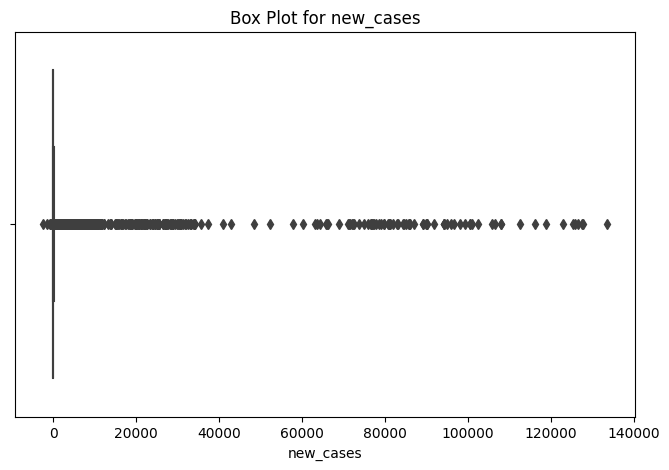

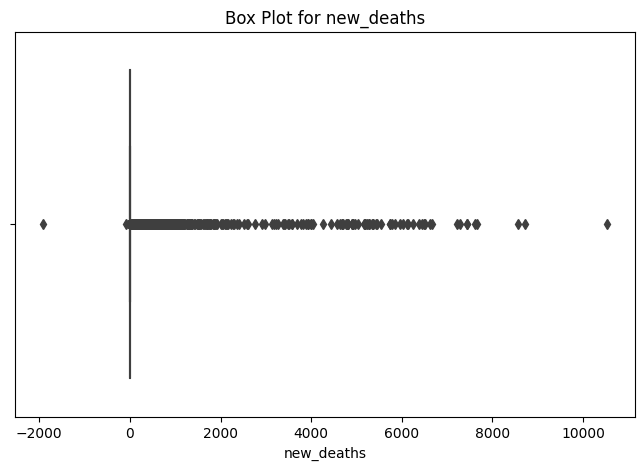

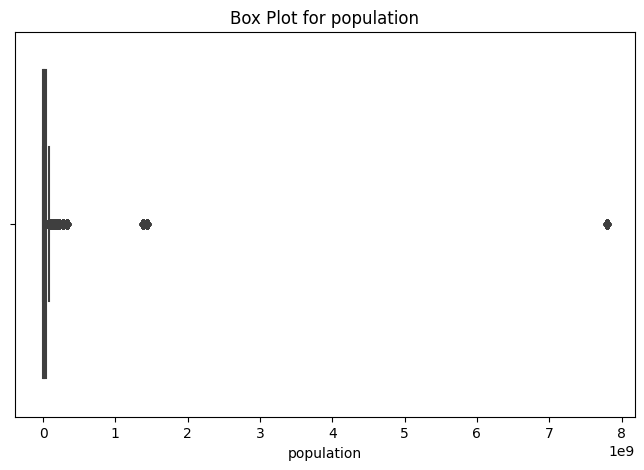

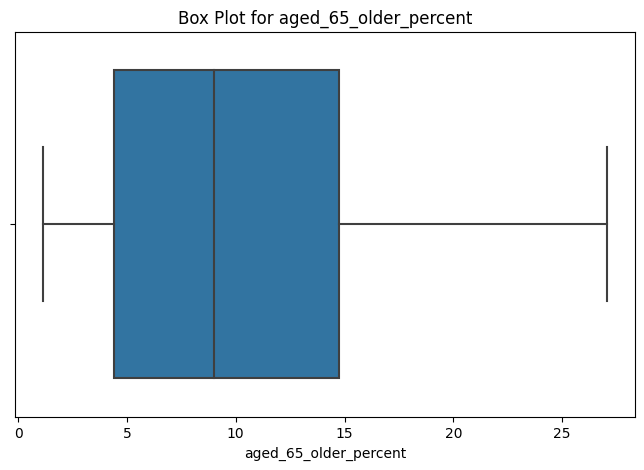

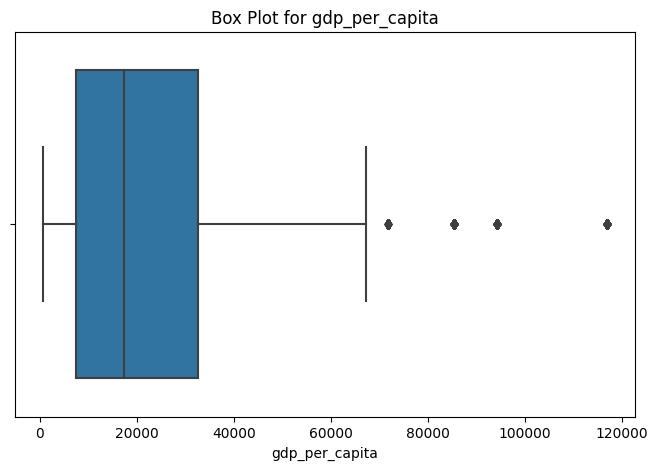

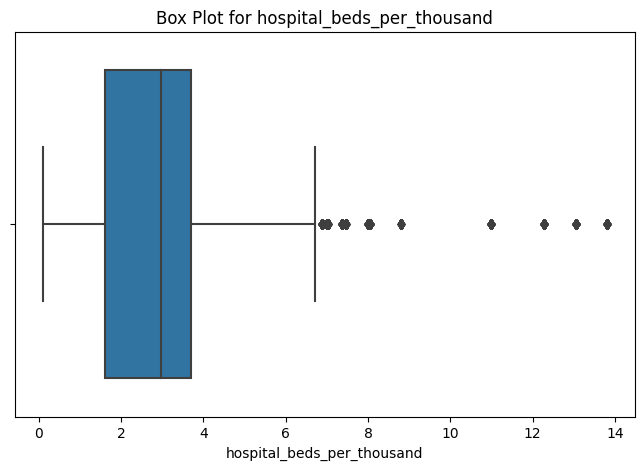

Rows with Outliers:
            location       date  new_cases  new_deaths    population  \
89       Afghanistan 2020-04-08         30           4  3.892834e+07   
90       Afghanistan 2020-04-09         56           3  3.892834e+07   
93       Afghanistan 2020-04-12         34           3  3.892834e+07   
95       Afghanistan 2020-04-14         58           3  3.892834e+07   
98       Afghanistan 2020-04-17         10           4  3.892834e+07   
...              ...        ...        ...         ...           ...   
23077  International 2020-02-28          0           0  1.037003e+08   
23078  International 2020-02-29          0           2  1.037003e+08   
23079  International 2020-03-01          0           0  1.037003e+08   
23080  International 2020-03-02          0           0  1.037003e+08   
23081  International 2020-03-10         -9           1  1.037003e+08   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
89                   2.58100     1803.98

In [18]:

from scipy.stats import zscore

# Columns to check for outliers
columns_to_check = ['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']

# Visual inspection using box plots
for column in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

# Z-score based outlier detection
outliers_zscore = pd.DataFrame()
for column in columns_to_check:
    z_scores = zscore(df[column])
    outliers_zscore[column] = abs(z_scores) > 3

# IQR-based outlier detection
outliers_iqr = pd.DataFrame()
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[column] = (df[column] < lower_bound) | (df[column] > upper_bound)

# Display rows with outliers based on either method
outliers_combined = outliers_zscore | outliers_iqr
rows_with_outliers = df[outliers_combined.any(axis=1)]
print("Rows with Outliers:")
print(rows_with_outliers)


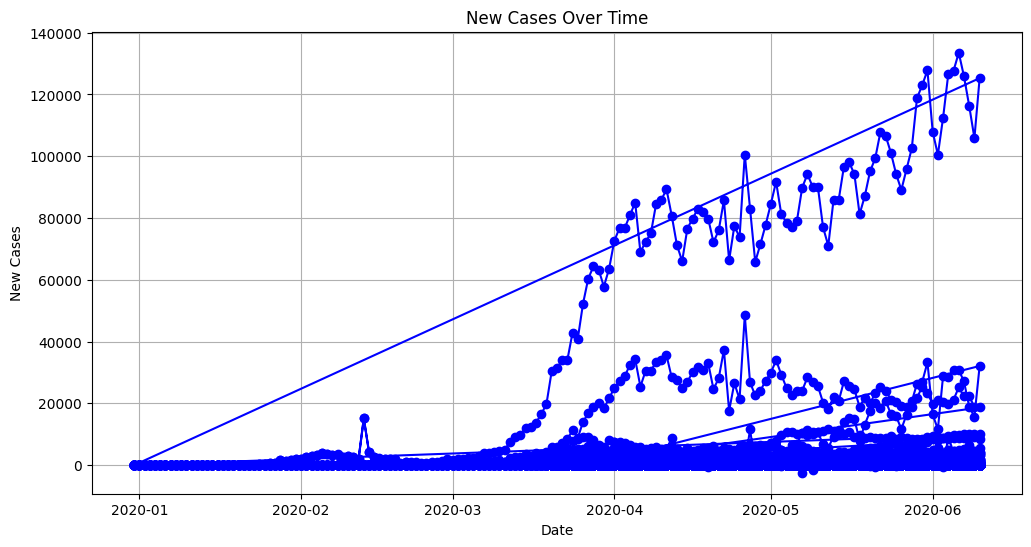

In [19]:
# Line plot for new cases over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], marker='o', linestyle='-', color='b')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()

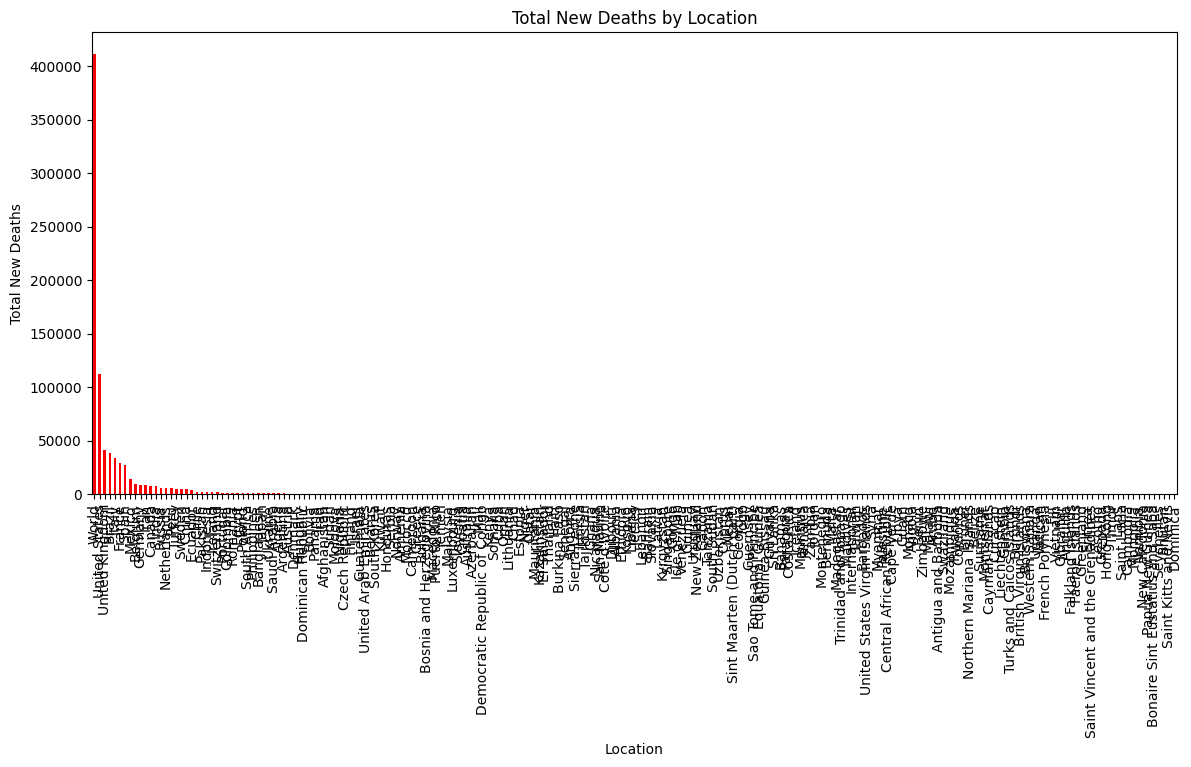

In [20]:
# Bar plot for new deaths by location
plt.figure(figsize=(14, 6))
bar_data = df.groupby('location')['new_deaths'].sum().sort_values(ascending=False)
bar_data.plot(kind='bar', color='r')
plt.title('Total New Deaths by Location')
plt.xlabel('Location')
plt.ylabel('Total New Deaths')
plt.show()

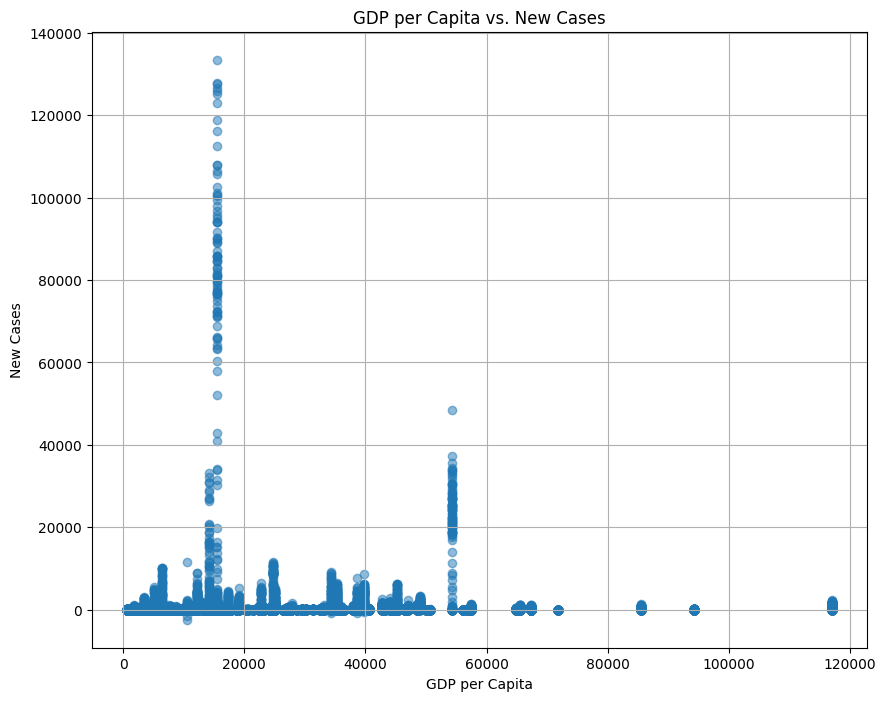

In [21]:
# Scatter plot for GDP per capita vs. new cases
plt.figure(figsize=(10, 8))
plt.scatter(df['gdp_per_capita'], df['new_cases'], alpha=0.5)
plt.title('GDP per Capita vs. New Cases')
plt.xlabel('GDP per Capita')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                            new_cases  new_deaths  population  \
new_cases                    1.000000    0.918490    0.659202   
new_deaths                   0.918490    1.000000    0.624126   
population                   0.659202    0.624126    1.000000   
aged_65_older_percent        0.017637    0.038468   -0.022944   
gdp_per_capita               0.011501    0.017173   -0.052698   
hospital_beds_per_thousand  -0.012399   -0.012632   -0.029887   

                            aged_65_older_percent  gdp_per_capita  \
new_cases                                0.017637        0.011501   
new_deaths                               0.038468        0.017173   
population                              -0.022944       -0.052698   
aged_65_older_percent                    1.000000        0.448377   
gdp_per_capita                           0.448377        1.000000   
hospital_beds_per_thousand               0.570627        0.224786   

                            hospital_be

<ipython-input-22-b130ef5bc284>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


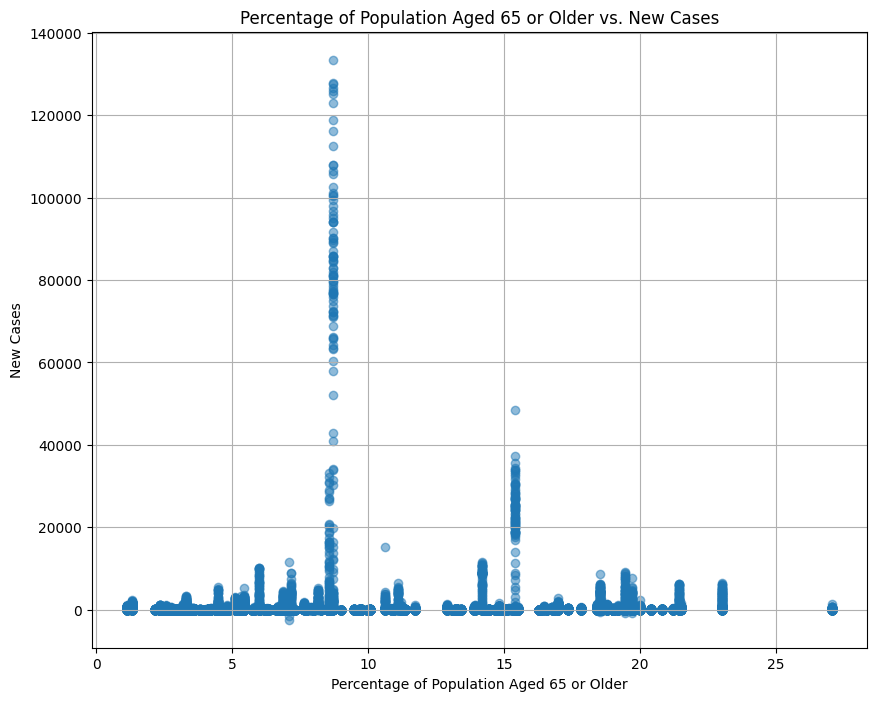

In [23]:
# Analyzing the impact of population demographics on new cases
plt.figure(figsize=(10, 8))
plt.scatter(df['aged_65_older_percent'], df['new_cases'], alpha=0.5)
plt.title('Percentage of Population Aged 65 or Older vs. New Cases')
plt.xlabel('Percentage of Population Aged 65 or Older')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()


In [24]:
# Grouping data by location to analyze regional patterns
regional_data = df.groupby('location').agg({
    'new_cases': 'sum',
    'new_deaths': 'sum',
    'population': 'mean',
    'gdp_per_capita': 'mean',
    'hospital_beds_per_thousand': 'mean'
}).reset_index()


In [25]:
# Identifying regions with high new cases per population
regional_data['new_cases_per_million'] = regional_data['new_cases'] / (regional_data['population'] / 1e6)


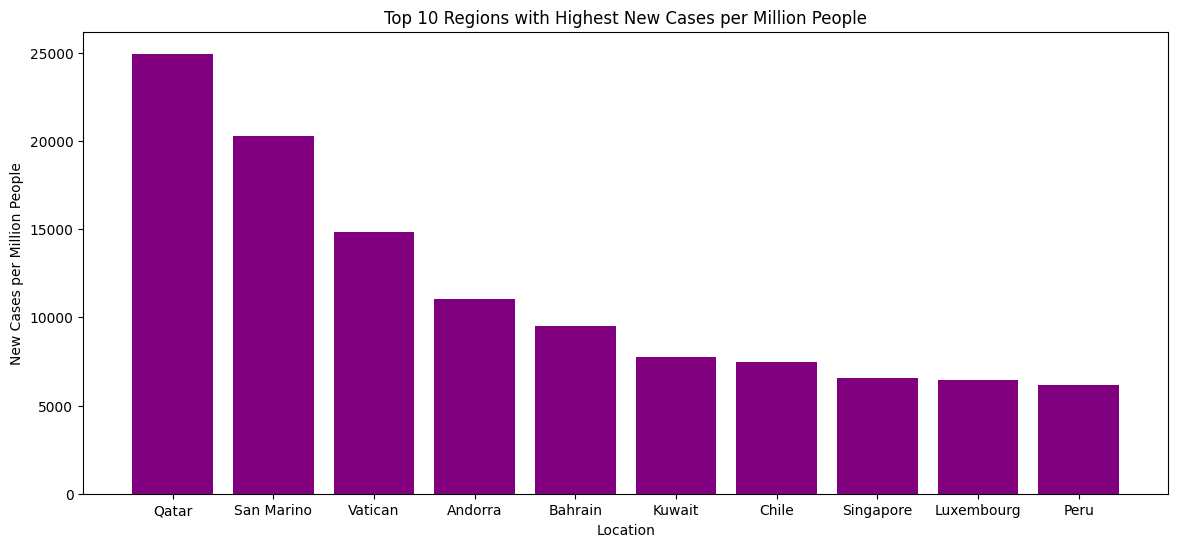

In [26]:
# Bar plot for regions with the highest new cases per million
plt.figure(figsize=(14, 6))
top_regions = regional_data.nlargest(10, 'new_cases_per_million')
plt.bar(top_regions['location'], top_regions['new_cases_per_million'], color='purple')
plt.title('Top 10 Regions with Highest New Cases per Million People')
plt.xlabel('Location')
plt.ylabel('New Cases per Million People')
plt.show()


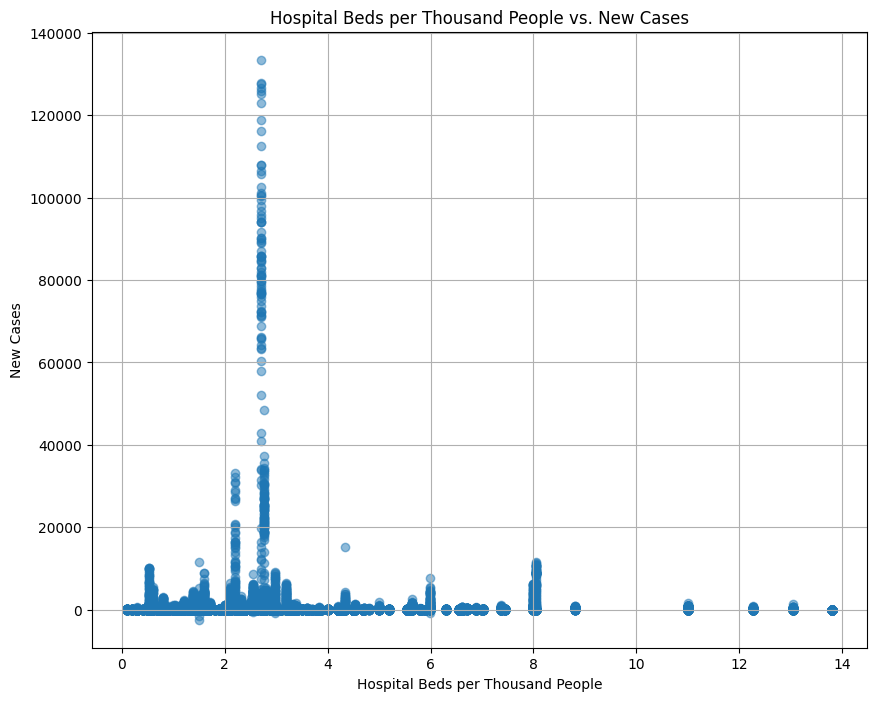

In [27]:
# Analyzing the relationship between new cases and hospital beds
plt.figure(figsize=(10, 8))
plt.scatter(df['hospital_beds_per_thousand'], df['new_cases'], alpha=0.5)
plt.title('Hospital Beds per Thousand People vs. New Cases')
plt.xlabel('Hospital Beds per Thousand People')
plt.ylabel('New Cases')
plt.grid(True)
plt.show()